![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/02_Decision%20Tree.%20A%20Supervised%20Classification%20Model/02_decision-tree_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 02 | Decision Tree. A Supervised Classification Model

## Load the Data

Load the dataset from [CIS](https://www.cis.es/cis/opencms/ES/index.html) executing the lines of code below:
> - The goal of this dataset is
> - To predict `internet_usage` of **people** (rows)
> - Based on their **socio-demographical characteristics** (columns)

In [42]:
import pandas as pd #!

df_internet = pd.read_excel('../data/internet_usage_spain.xlsx', sheet_name=1)
df_internet

,name,internet_usage,sex,age,education
0,Josefina,0,Female,66,Elementary
1,Vicki,1,Male,72,Elementary
2,David,1,Male,48,University
3,Curtis,0,Male,59,PhD
4,Josephine,1,Female,44,PhD
...,...,...,...,...,...
2450,Frances,1,Male,43,Elementary
2451,Harry,1,Female,18,High School
2452,Adam,0,Female,54,Elementary
2453,Christine,1,Male,31,High School


*Deleting the name columns, because they are irrelevant data*

In [44]:
df_internet = df_internet.drop(columns="name")

In [46]:
df_internet.head()

,internet_usage,sex,age,education
0,0,Female,66,Elementary
1,1,Male,72,Elementary
2,1,Male,48,University
3,0,Male,59,PhD
4,1,Female,44,PhD


## Data Preprocessing

1. The Python function to fit the model cannot process information as a string. Therefore, you need to convert **categorical variables to dummy variables**.
2. You need to check for **missing data** and drop it in case there are.

*Converting the categorical data to numerical data*

In [47]:
df_internet = pd.get_dummies(df_internet, drop_first=True)

*Dropping the NaN values*

In [48]:
df_internet = df_internet.dropna()

*Separing the variables*

In [49]:
features = df_internet.drop(columns="internet_usage")

In [50]:
target = df_internet.internet_usage

## `DecisionTreeClassifier()` Model in Python

### Fit the Model

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
model_dt = DecisionTreeClassifier()

In [53]:
model_dt.fit(X=features, y=target)

DecisionTreeClassifier()

In [54]:
df_internet.head()

,internet_usage,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
0,0,66,0,0,0,0,0,0
1,1,72,1,0,0,0,0,0
2,1,48,1,0,0,0,0,1
3,0,59,1,0,0,0,1,0
4,1,44,0,0,0,0,1,0


### Calculate Predictions

In [55]:
model_dt.predict(X=features)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

### Create a New DataFrame for the Predictions

In [56]:
df_pred = df_internet[["internet_usage"]].copy()

In [57]:
df_pred["pred_dt"] = model_dt.predict(X=features) 

### Visualize the Model

In [58]:
from sklearn.tree import plot_tree

In [59]:
model_dt = DecisionTreeClassifier(max_depth=2)

*We fit the model again to make the changes in the graphic*

In [60]:
model_dt.fit(X=features, y=target)

DecisionTreeClassifier(max_depth=2)

In [61]:
import matplotlib.pyplot as plt

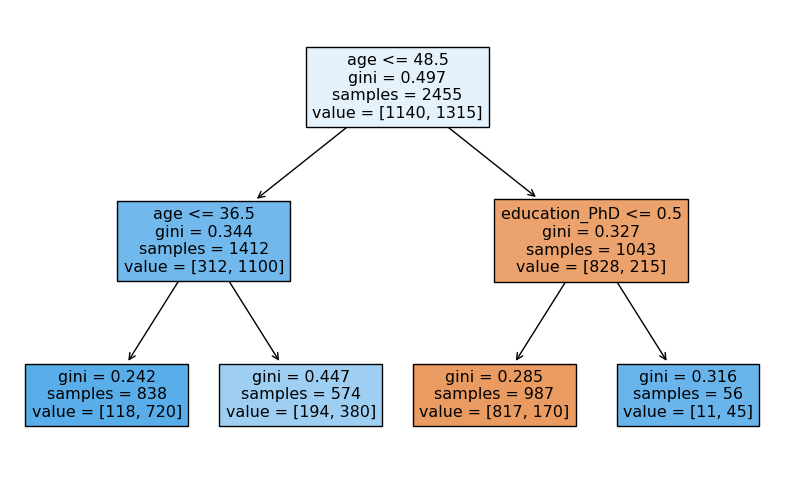

In [62]:
plt.figure(figsize=(10,6))
plot_tree(decision_tree=model_dt, max_depth=2, feature_names=features.columns, filled=True);

### Model Interpretation

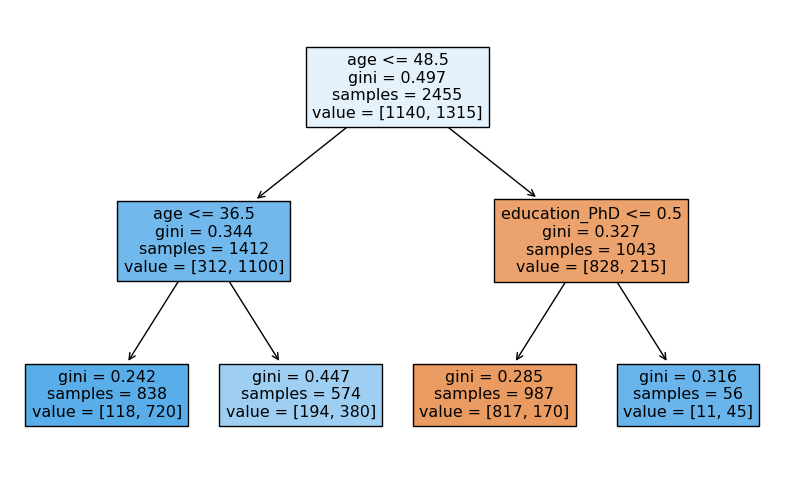

In [63]:
plt.figure(figsize=(10,6))
plot_tree(decision_tree=model_dt, feature_names=features.columns, filled=True);

In [64]:
df_internet[:1]

,internet_usage,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
0,0,66,0,0,0,0,0,0


In [65]:
model_dt.predict_proba(X=features[:1])[:,1]

array([0.17223911])

### Model's Score

In [66]:
model_dt.score(X=features, y=target)

0.7991853360488799

*The model can explain the 79 % of the data*

## Confusion Matrix

In [67]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

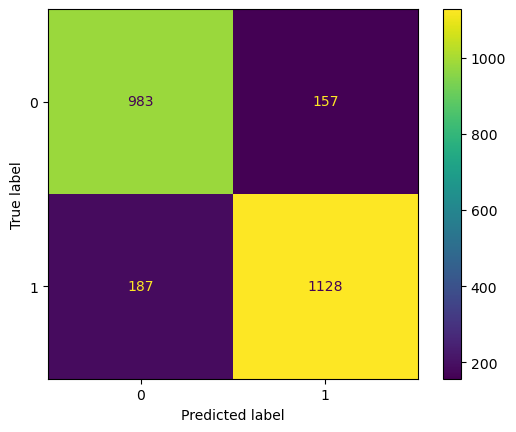

In [68]:
cm = confusion_matrix(
    y_true=df_pred.internet_usage,
    y_pred=df_pred.pred_dt
    )

CM = ConfusionMatrixDisplay(cm)

CM.plot()

### Classification Report

In [69]:
report = classification_report(
    y_true=df_pred.internet_usage,
    y_pred=df_pred.pred_dt
    )

print(report)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1140
           1       0.88      0.86      0.87      1315

    accuracy                           0.86      2455
   macro avg       0.86      0.86      0.86      2455
weighted avg       0.86      0.86      0.86      2455



### Sensitivity (Recall=1)

In [70]:
1145 / (1145 + 170)

0.870722433460076

### Specificity (Recall=0)

In [71]:
817 / (817 + 323)

0.7166666666666667

### ROC Curve

In [72]:
from sklearn import metrics

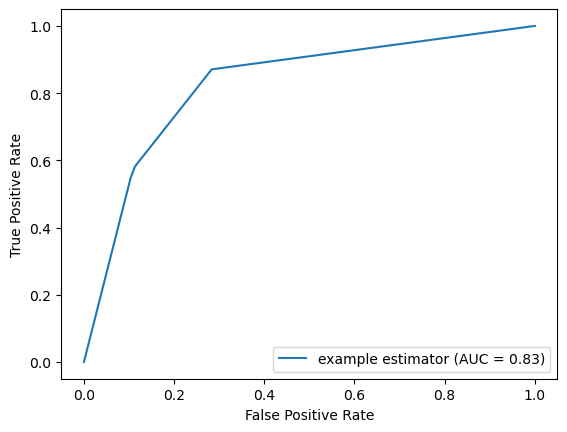

In [73]:
y = df_internet.internet_usage
pred = model_dt.predict_proba(X=features)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()

plt.show()

## `RandomForestClassifier()` in Python

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
model_rf = RandomForestClassifier()

### Fit the Model

In [76]:
model_rf.fit(X=features, y=target)

RandomForestClassifier()

### Calculate Predictions

In [77]:
model_rf.predict(X=features)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

### Model's Score

In [78]:
model_rf.score(X=features, y=target)

0.859877800407332

## `SVC()` in Python

In [79]:
from sklearn.svm import SVC

In [80]:
model_sv = SVC()

### Fit the Model

In [81]:
model_sv.fit(X=features, y=target)

SVC()

### Calculate Predictions

In [82]:
model_sv.predict(X=features)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

### Model's Score

In [83]:
model_sv.score(X=features, y=target)

0.7837067209775967

## Which One Is the Best Model? Why?

In [84]:
model_dt.score(X=features, y=target)

0.7991853360488799

In [85]:
model_rf.score(X=features, y=target)

0.859877800407332

In [86]:
model_sv.score(X=features, y=target)

0.7837067209775967

***The best model is the `Random Forest Classifier`, with a 99 % of score***

## Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [X] Understand how **the Decision Tree Algorithm** is just counting observations to determine the outcome.
- [X] Another way to **compare real data with predictions** from the model.
- [X] Not all model visualizations are equal.
    - A tree was visualized instead of an `scatterplot()` to interpret the model.
- [X] Distinguish **probability's role** to optimize this type of models.
- [X] Know how to determine **why a variable is important** in the model.
    - Why is it giving significant differences?
    - How does EDA helps us to see it?
- [X] Understand the process of the algorithm to determine if we need to **normalize/scale** the data.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.